# Deep Neural Networks

Here we build a deep neural network from scratch and use it to classify images from the [fashion_mnist dataset](https://keras.io/api/datasets/fashion_mnist/ "Title"). We start by importing necessary libraries and data:

In [1]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# using the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()

Next we check the dimensions of our feature tensors train_$X$ and test_$X$. The first dimension for each of these tensors corresponds to the number of images in each tensor (60,000 for training and 10,000 for testing), and the other numbers refer to each image being a 28 by 28 grayscale image. We see in the below print statements that each pixel takes on a value between 0 (white) and 255 (black):

In [2]:
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0  

Now that we've imported the fashion_mnist dataset and we understand the dimensions of our training and testing data, we take a look at a particular piece of training data. As a note, the labels for each fashion article are as follows:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle Boot

train_y[0] = 9 



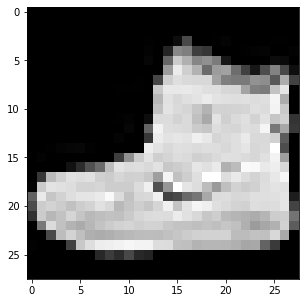

In [3]:
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[0], cmap="gray")
plt.show()

Now we're ready to build our deep neural network! To start, we scale our data so that each pixel takes on a greyscale value in the interval [0, 1]. Then, we flatten each 28 by 28 image into a vector of length 784. We finish by one-hot encoding the training labels:

In [4]:
# scaling the data for training
train_X = train_X/255
test_X = test_X/255

# flattening the training images into coloumn vectors
flat_train_X = []

# one-hot encoding the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   
# doing the same for the testing data
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)
    

Now that we've preprocessed our data, we define our activation function (the sigmoid function), its derivative, and our loss function (mean squared error) for our model:

In [5]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

We also need to initialize the weights and biases for our network. We do so here with a particular scaling factor given below:

In [17]:
def initialize_weights(layers = [784, 60, 60, 10]):
    W = [[0.0]] # initializing a list of weight matrices for the network
    B = [[0.0]] # initializing a list of bias matrices for the network
    for i in range(1, len(layers)):
        # the scaling factor below was taken from a research paper
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp) # adding a matrix to the above "weight list" W
        B.append(b_temp) # adding a matrix to the above "bias list" B
    return W, B

We verify the shapes of our weight matrices and pre/post-activation values below. Moreover, we feed in the above image of an ankle boot into our model and compare true label with that predicted by our model:

In [39]:
W, B = initialize_weights()

xi = flat_train_X[0] # example image
yi = onehot_train_y[0] # corresponding one-hot encoded label
a0 = xi # input signal to the network

print(f"np.shape(a0) = {np.shape(a0)} \n")

z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1) # post-activation value for the first layer

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2) # post-activation value for the second layer

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3) # output of the network
y_hat = a3 # the model's prediction
print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")


print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 5
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.2780046024760783


Our model predicted that this was a sandal $(5)$, wherein reality it was an ankle boot $(9)$. Not bad - especially considering we haven't even trained it yet!

Now at this point, we've almost built our model entirely. We'll define a few more functions, however, to automate certain tasks. For example, we define a forward_pass function which feeds a piece of data through our network, and a predict function that predicts which class the data point belongs to based on the value it takes on in final layer of the network:

In [16]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]] # list of pre-activation values
    A = [xi] # list of post-activation values
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z) # updating list of pre-activation values
        
        a = sigmoid(z)
        A.append(a) # updating list of post-activation values
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 5
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.7853157902275847


Using the forward_pass and predict functions, we obtain the same prediction as in the above code cell but with less code. We continue by defining two functions: random_experiment, which performs a prediction on one image and compares this to the true label; and MSE, which aggregates the mean squared error over all training data:

In [41]:
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    
def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True) # output/prediction of the network for the input image xi
        cost += mse(a, yi) # adding to our loss function
        m += 1 # updating our iterator
    return cost/m

We test these functions out below using our flattened training image data and our one-hot encoded labels:

In [42]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n") # calculating the loss function over all the training data

random_experiment(W, B, flat_train_X, onehot_train_y) # performing a prediction on one piece of training data

MSE(W, B, flat_train_X, onehot_train_y) = 1.316892767361754 

Actual label: 9
Predicted label: 5


Now we can define a custom DenseNetwork class using the above functions. Note that we use stochastic gradient descent to update the weights and biases of our network:

In [43]:
class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # printing the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # finding the sample size
        sample_size = len(X_train)

        # finding the number of non-input layers
        L = len(self.layers) - 1

        # for each epoch, perform stochastic gradient descent
        for k in range(epochs):
            # looping over each (xi, yi) training pair of data
            for xi, yi in zip(X_train, y_train):
                # using the forward pass function defined before
                # and find the preactivation and postactivation values
                Z, A = forward_pass(self.W, self.B, xi)

                # storing the errors in a dictionary for clear interpretation
                # of computation of these values
                deltas = dict()

                # computing the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # looping from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # looping over each hidden layer and the output layer to perform gradient 
                # descent 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # showing the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

We instantiate a DenseNetwork object "net" with an input layer with 784 nodes, two hidden layers with 60 nodes each, and an output layer with 10 nodes. Also, we make one final prediction on a training image before training our model:

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.5483676073019947 

predicted digit is: 1
actual digit is: 8


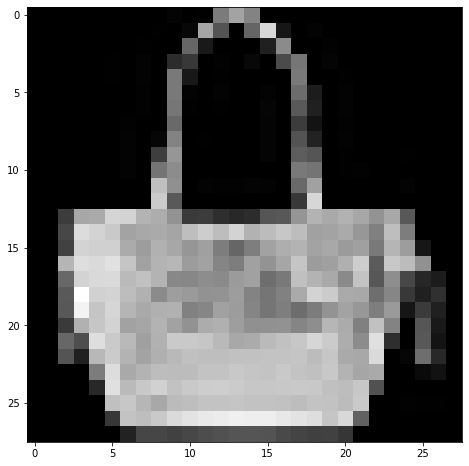

In [44]:
net = DenseNetwork(layers = [784, 60, 60, 10])

# checking the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# making a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

Now we train our model by using DenseNetwork's train method:

In [45]:
# training the network with stochastic gradient descent
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.5483676073019947
1-Epoch Cost = 0.11965373254051292
2-Epoch Cost = 0.10455464731377381
3-Epoch Cost = 0.09724488290442637
4-Epoch Cost = 0.09337667212609542


To get a visual idea of how well our model learns over its training process, we plot the mean squared error at each epoch below:

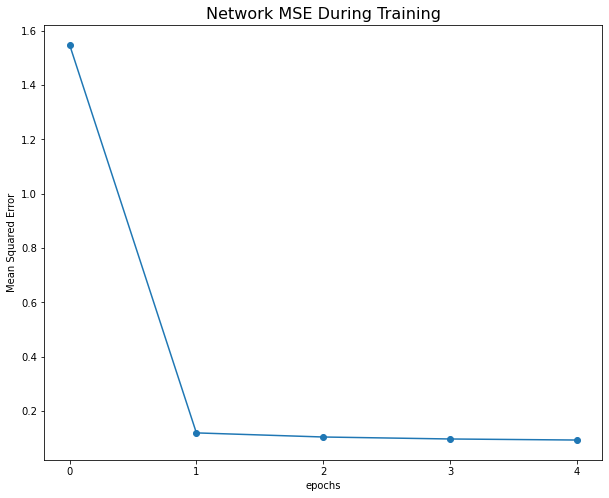

In [46]:
# visualizing the mean squared error over the training process 
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()

Now that our model has been trained we test it out on images of fashion articles it hasn't seen before. The following seven cells execute such predictions, showing the predicted label, the actual label, and a picture of the fashion article for reference:

predicted digit is: 7
actual digit is: 7


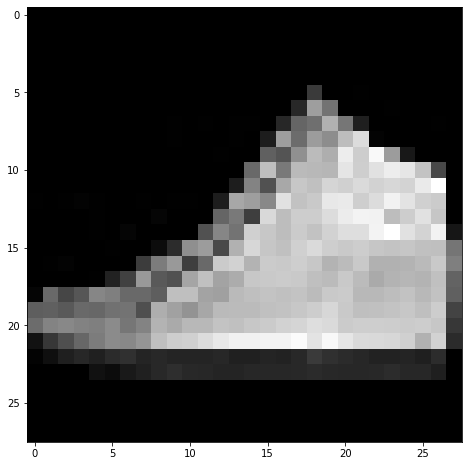

In [47]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 6
actual digit is: 6


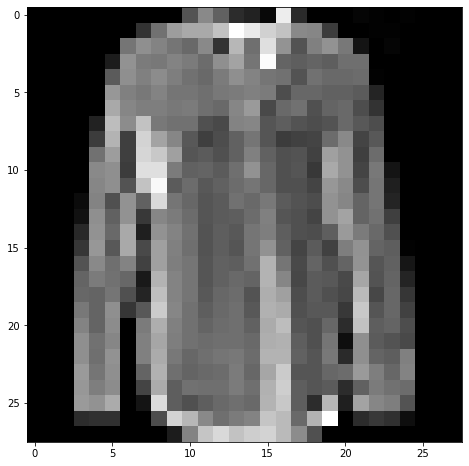

In [48]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 5
actual digit is: 5


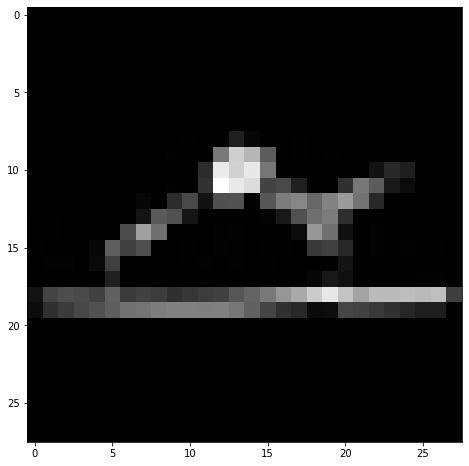

In [49]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 2
actual digit is: 4


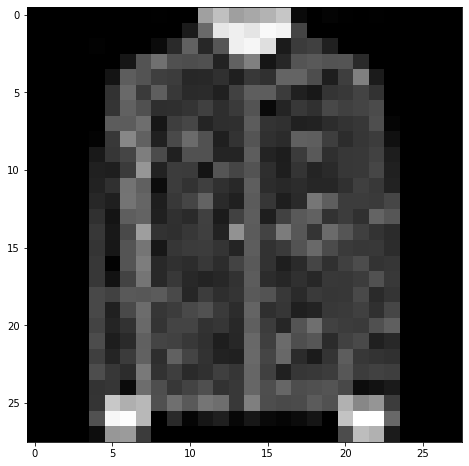

In [50]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

The above prediction was incorrect, but the model should be given some grace! It predicted that this was a pullover when in reality it was a coat! I'm not even sure I could have gotten than one right!

predicted digit is: 5
actual digit is: 5


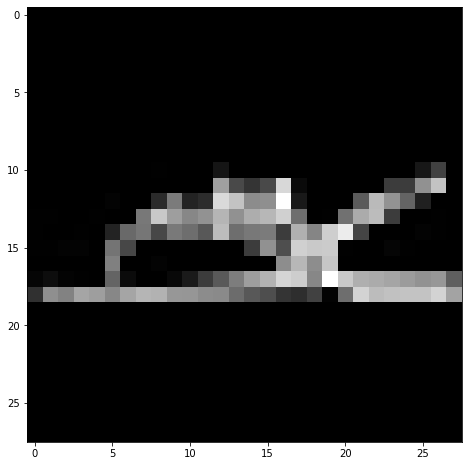

In [51]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 4
actual digit is: 4


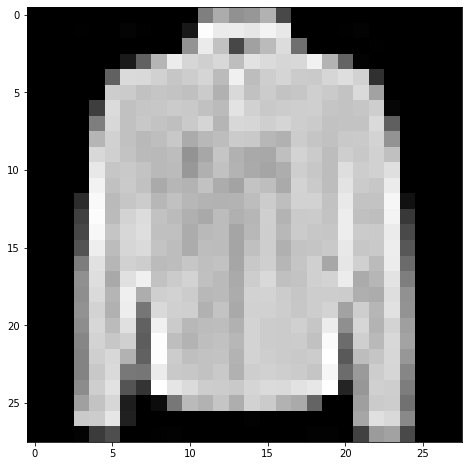

In [52]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 8
actual digit is: 8


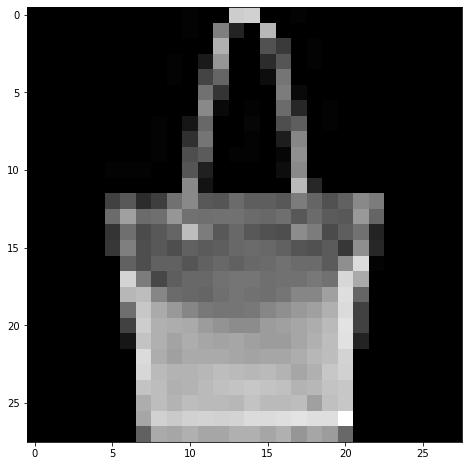

In [54]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

We finish by computing the classification accuracy of our model on the test data:

In [55]:
# Compute the classification accuracy of our trained model on the test data (I bet we did well!)
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.8541

That's pretty good: our model correctly guessed 8,541 out of 10,000 fashion articles it had never seen before! This seems like a success and as such, concludes our analysis of deep neural networks!